# This notebook covers Neural Networks with MNITS Dataset.

In [1]:
# Import NumPy, Matplotlib, and Tensorflow libraries.
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,  Dense, Flatten
from tensorflow.keras.activations import relu, sigmoid


In [2]:
# Load MNIST Dataset from Tensorflow.
# The dataset is pre-split into training and testing datasets.
(X_train, y_train), (x_test, y_test )=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


<function matplotlib.pyplot.show(close=None, block=None)>

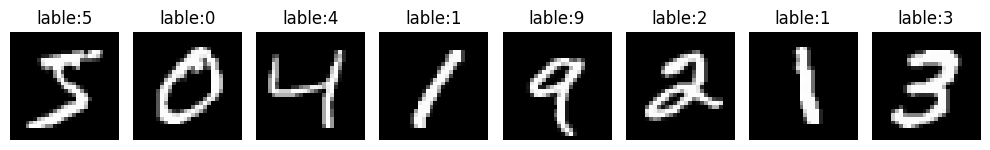

In [3]:
# Visualize the MNIST Dataset using Matplotlib.
plt.figure(figsize=(10, 5))
for i in range (8):
    plt.subplot(1,8,i+1)
    plt.imshow(X_train[i], cmap ='gray')
    plt.title(f"lable:{y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show

In [4]:
# Training Dataset Size.
print ('The shape of X train is: ' + str(X_train.shape))
print ('The shape of y train is: ' + str(y_train.shape))

The shape of X train is: (60000, 28, 28)
The shape of y train is: (60000,)


In [5]:
# Testing Dataset Size.
print ('The shape of X test is: ' + str(x_test.shape))
print ('The shape of y test is: ' + str(y_test.shape))

The shape of X test is: (10000, 28, 28)
The shape of y test is: (10000,)


In [6]:
# Setting Seed.
tf.random.set_seed(42)

In [7]:
# Model Architecture.
model=Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(25, activation='relu', name ="Layer1"),
    Dense(15, activation='relu', name ="Layer2"),
    Dense(10, activation='softmax', name ="Layer3"),
    ], name = "My_Model"
)

In [8]:
# Model Summary with Parameters.
model.summary()

Model: "My_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer1 (Dense)                  │ (None, 25)             │        19,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer2 (Dense)                  │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer3 (Dense)                  │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,175 (78.81 KB)

 Trainable params: 20,175 (78.81 KB)

 Non-trainable params: 0 (0.00 B)

![ann_1.jpg](attachment:b3867c52-de42-4a2b-9b73-21665872d8de.jpg)

In [9]:
# Model Layers.
[flatten, layer1, layer2, layer3] = model.layers

In [10]:
# Model Weights and Bias.
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [11]:
# Compile and Train Model.
model.compile(
    loss= "SparseCategoricalCrossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = model.fit(
    X_train,y_train,
    validation_split=0.2,
    epochs=40
)

Epoch 1/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3327 - loss: 6.7444 - val_accuracy: 0.6596 - val_loss: 1.0434
Epoch 2/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6771 - loss: 0.9367 - val_accuracy: 0.7418 - val_loss: 0.7427
Epoch 3/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7416 - loss: 0.7111 - val_accuracy: 0.7768 - val_loss: 0.6520
Epoch 4/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7809 - loss: 0.6260 - val_accuracy: 0.7772 - val_loss: 0.6509
Epoch 5/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7932 - loss: 0.5809 - val_accuracy: 0.8175 - val_loss: 0.5654
Epoch 6/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8150 - loss: 0.5361 - val_accuracy: 0.8317 - val_loss: 0.5403
Epoch 7/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8340 - loss: 0.5157 - val_accuracy: 0.8578 - val_loss: 0.5008
Epoch 8/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8522 - loss: 0.4860 - 

In [12]:
# Model Loss, Validation Loss, Accuracy, and Validation Accuracy
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history.get('accuracy')
val_accuracy = history.history.get('val_accuracy')

epochs_range = range(1, len(loss) + 1)

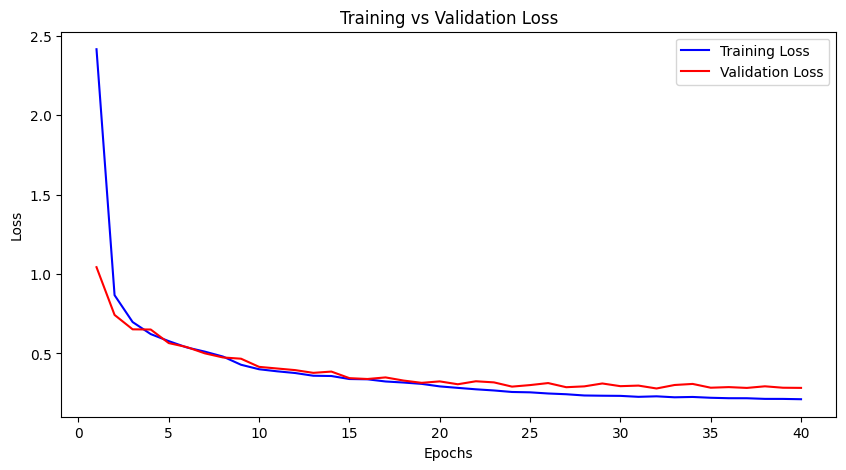

In [13]:
# Plot Training and Validation Loss.
plt.figure(figsize=(10, 5))
plt.plot(epochs_range, loss, 'b-', label='Training Loss')
plt.plot(epochs_range, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

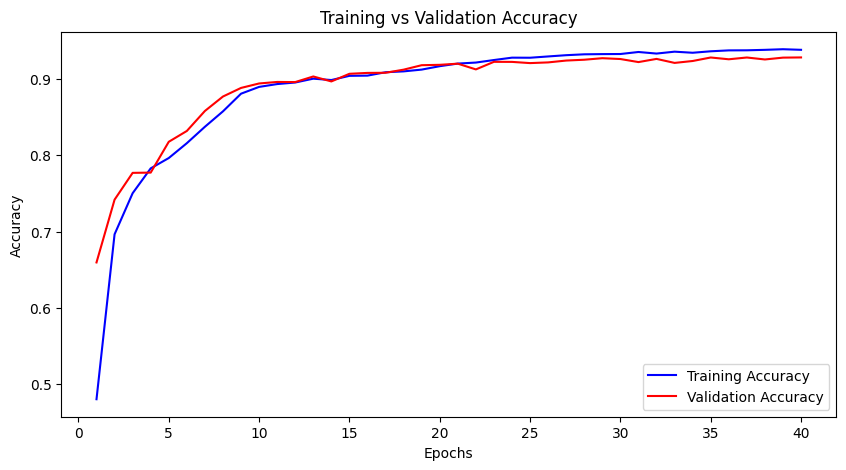

In [14]:
# Model Training and Validation Accuracy
if accuracy and val_accuracy:
    plt.figure(figsize=(10, 5))
    plt.plot(epochs_range, accuracy, 'b-', label='Training Accuracy')
    plt.plot(epochs_range, val_accuracy, 'r-', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()
    plt.show()

In [15]:
# Obtain Testing Accuracy, Confusion Matrix, and Classification Report for
# Testing Dataset.
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Evaluate model on test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Overall Test Accuracy: {test_accuracy:.4f}")

# Predict classes on test dataset
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Overall Test Accuracy: 0.9213
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
[[ 943    0    1    1    4   17    7    2    5    0]
 [   0 1105    8    0    1    0    6    2   13    0]
 [  11    2  938   30    5    7    8   18   13    0]
 [   0    0   21  896    1   55    1    6   29    1]
 [   4    0    7    3  913    2   15    4    5   29]
 [  23    1    5   18    7  768   15    7   39    9]
 [  35    0    7    0    2   14  893    0    7    0]
 [   1    5   18   21    2    1    0  958    4   18]
 [   9    6    5   15    4   27   21    8  866   13]
 [  10    4    1    5   18   11    2   13   12  933]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       980
           1       0.98      0.97      0.98      1135
           2       0.93      0.91      0.92      1032
           3       0.91      0.89      0.90      1010
           4       0.95      0.93      0.94       982
           5       0.85      0.8